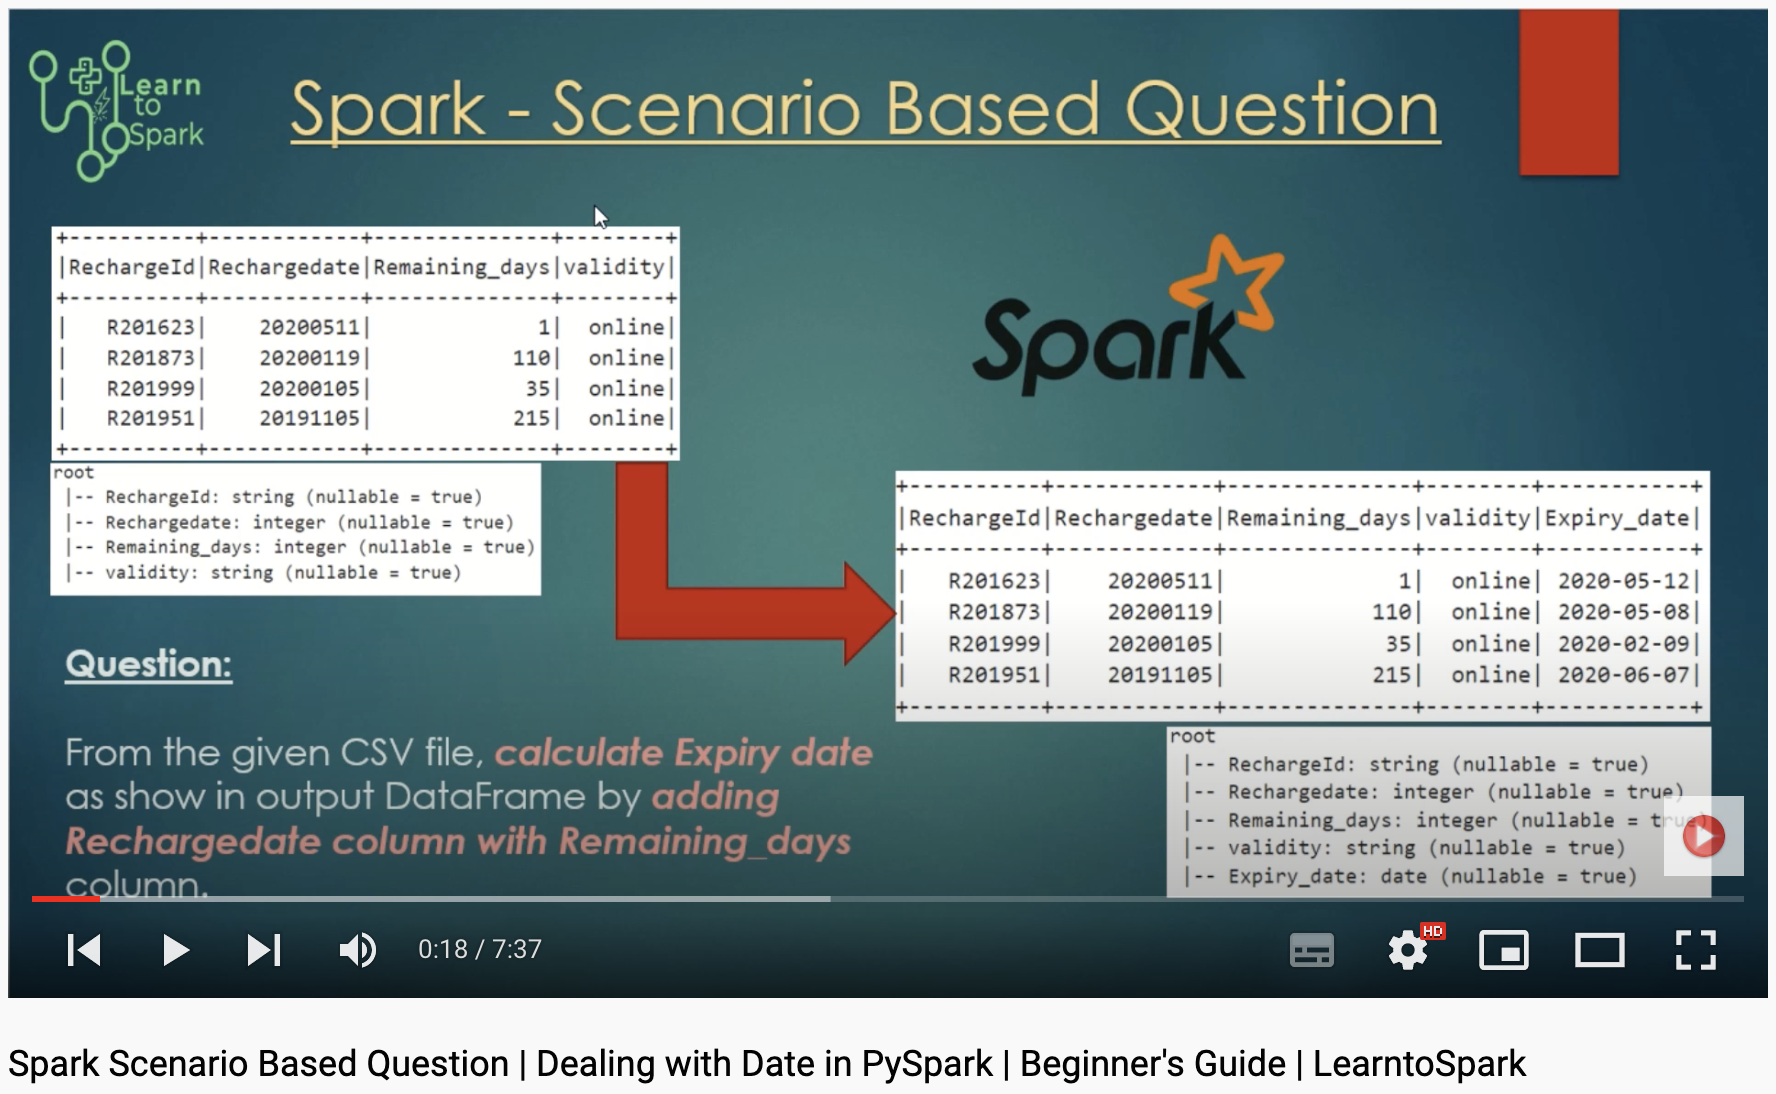

In [35]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
spark = SparkSession.builder.appName("dealing_with_date").getOrCreate()

In [3]:
df = spark.read.option("delimiter","|").csv("recharge_date.csv", header = True)

In [4]:
df.show()

+----------+------------+--------------+--------+
|RechargeId|RechargeDate|Remaining_days|validity|
+----------+------------+--------------+--------+
|   R201623|    20200511|             1|  online|
|   R201873|    20200119|           110|  online|
|   R201999|    20200105|            35|  online|
|   R201951|    20191105|           215|  online|
+----------+------------+--------------+--------+



In [5]:
df.printSchema()

root
 |-- RechargeId: string (nullable = true)
 |-- RechargeDate: string (nullable = true)
 |-- Remaining_days: string (nullable = true)
 |-- validity: string (nullable = true)



In [43]:
df_i = df.select(col("Remaining_days").cast("int"))

In [50]:
df1 = df.withColumn("Remaining_days",col("Remaining_days").cast("int"))

In [51]:
df1.printSchema()

root
 |-- RechargeId: string (nullable = true)
 |-- RechargeDate: string (nullable = true)
 |-- Remaining_days: integer (nullable = true)
 |-- validity: string (nullable = true)



In [7]:
from pyspark.sql.functions import date_add,to_date,col,expr

In [52]:
df1.select(to_date("RechargeDate")).show()

#to_date: to convert to date, but getting null value.
#if we use format "yyyymmdd" then value will come

+---------------------+
|to_date(RechargeDate)|
+---------------------+
|                 null|
|                 null|
|                 null|
|                 null|
+---------------------+



In [53]:
df1.select(to_date("RechargeDate","yyyymmdd")).show()

+-------------------------------+
|to_date(RechargeDate, yyyymmdd)|
+-------------------------------+
|                     2020-01-11|
|                     2020-01-19|
|                     2020-01-05|
|                     2019-01-05|
+-------------------------------+



In [54]:
df2 = df1.withColumn("RechargeDate_in_dateformat",to_date("RechargeDate","yyyymmdd"))

In [55]:
df2.show()

+----------+------------+--------------+--------+--------------------------+
|RechargeId|RechargeDate|Remaining_days|validity|RechargeDate_in_dateformat|
+----------+------------+--------------+--------+--------------------------+
|   R201623|    20200511|             1|  online|                2020-01-11|
|   R201873|    20200119|           110|  online|                2020-01-19|
|   R201999|    20200105|            35|  online|                2020-01-05|
|   R201951|    20191105|           215|  online|                2019-01-05|
+----------+------------+--------------+--------+--------------------------+



In [56]:
df2.printSchema()

root
 |-- RechargeId: string (nullable = true)
 |-- RechargeDate: string (nullable = true)
 |-- Remaining_days: integer (nullable = true)
 |-- validity: string (nullable = true)
 |-- RechargeDate_in_dateformat: date (nullable = true)



In [57]:
df2.select(expr("date_add(RechargeDate_in_dateformat,Remaining_days)")).show()

+----------------------------------------------------+
|date_add(RechargeDate_in_dateformat, Remaining_days)|
+----------------------------------------------------+
|                                          2020-01-12|
|                                          2020-05-08|
|                                          2020-02-09|
|                                          2019-08-08|
+----------------------------------------------------+



In [66]:
df2.select("*", expr("date_add(RechargeDate_in_dateformat,Remaining_days)" "output_col")).show()
# '*' to add all other cols
# in expr i am using an alais

+----------+------------+--------------+--------+--------------------------+----------+
|RechargeId|RechargeDate|Remaining_days|validity|RechargeDate_in_dateformat|output_col|
+----------+------------+--------------+--------+--------------------------+----------+
|   R201623|    20200511|             1|  online|                2020-01-11|2020-01-12|
|   R201873|    20200119|           110|  online|                2020-01-19|2020-05-08|
|   R201999|    20200105|            35|  online|                2020-01-05|2020-02-09|
|   R201951|    20191105|           215|  online|                2019-01-05|2019-08-08|
+----------+------------+--------------+--------+--------------------------+----------+

